In [4]:
!pip install skillsnetwork

In [5]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot
import seaborn as sns
from scipy import stats
import skillsnetwork
import numpy as np


In [6]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [7]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
df["peak-rpm"].dtypes

dtype('O')

**Calculate the correlation between variables of type "int64" or "float64" using the method "corr":**

In [10]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

<ipython-input-10-b8bf63243e7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['bore','stroke','compression-ratio','horsepower']].corr()


,compression-ratio
compression-ratio,1.0


**Continuous Numerical Variables:**
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

In [11]:
df.replace("?", np.nan, inplace = True)


In [12]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

avg_peak = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak, inplace=True)

In [13]:
df[["price"]] = df[["price"]].astype("int")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("int")
df[["stroke"]] = df[["stroke"]].astype("float")
df.dtypes
#df[["horsepower"]] = df[["horsepower"]].astype("int")

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

(0.0, 53135.13340117559)

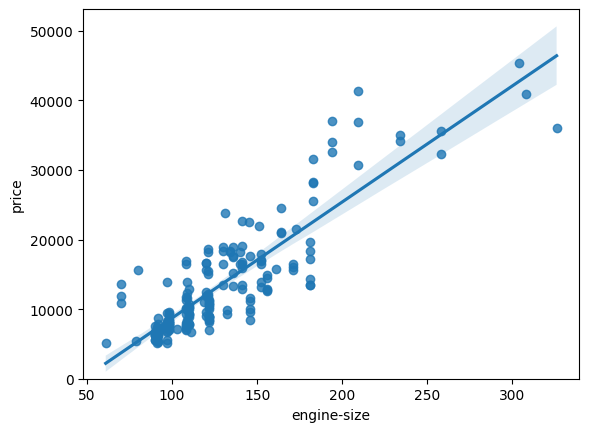

In [14]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [15]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

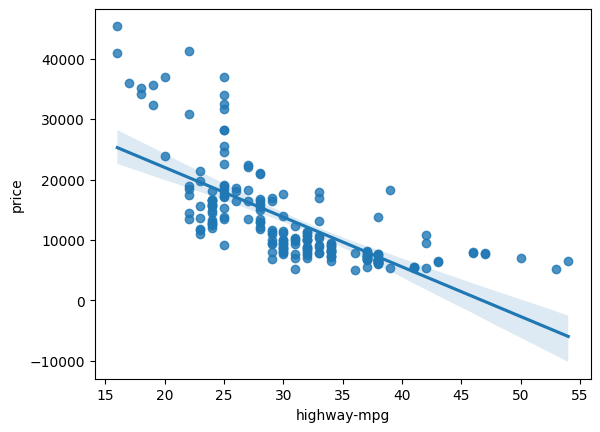

In [16]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [17]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


**Weak Linear Relationship**

<Axes: xlabel='peak-rpm', ylabel='price'>

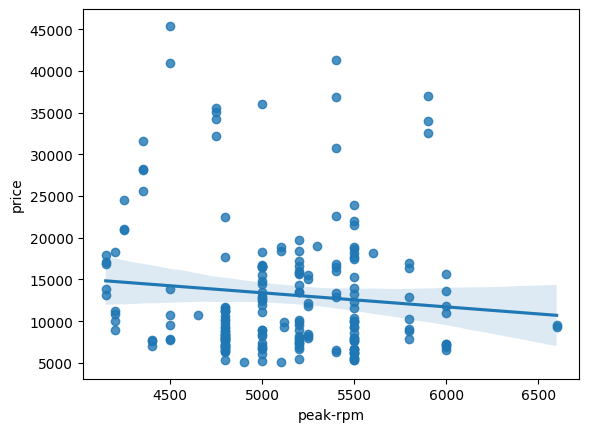

In [18]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [19]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101536
price,-0.101536,1.000000


In [20]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

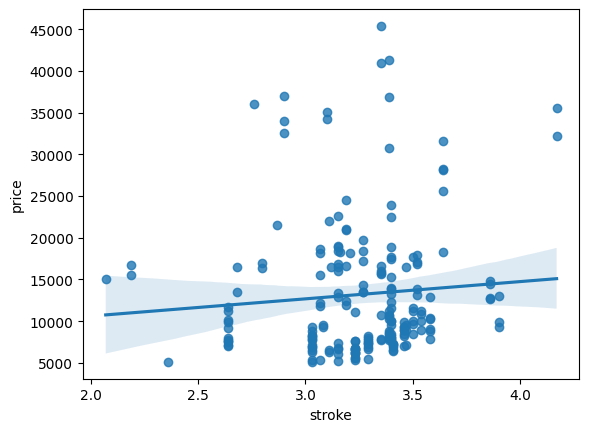

In [21]:
sns.regplot(x="stroke", y="price", data=df)

**Categorical Variables**
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

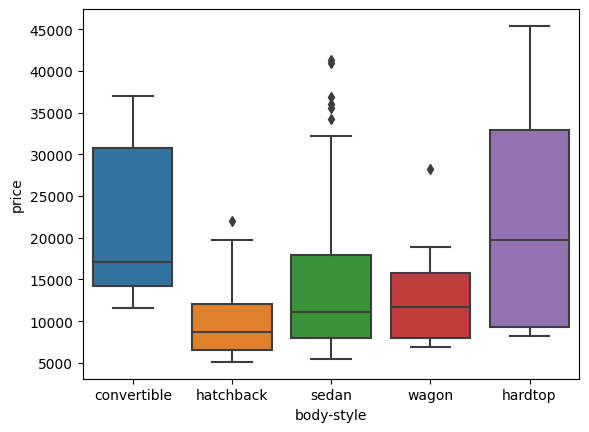

In [22]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

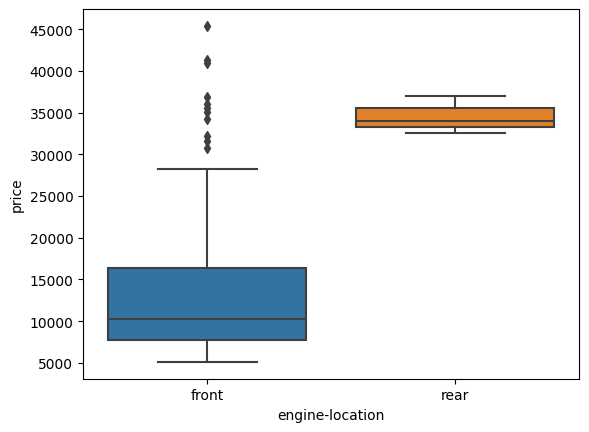

In [23]:
sns.boxplot(x="engine-location", y="price", data=df)
#Here we see that the distribution of price between these two engine-location categories, front and rear,
#are distinct enough to take engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

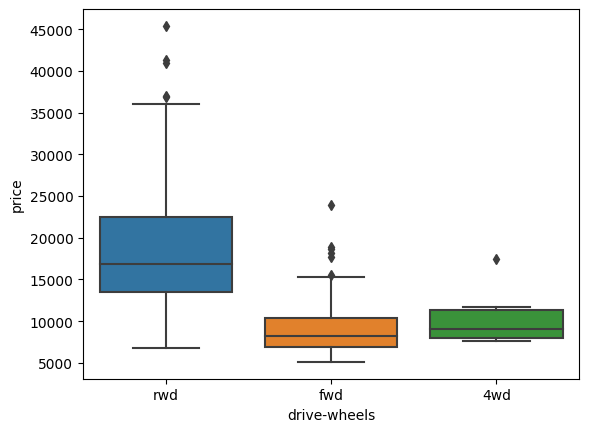

In [24]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

**Descriptive Statistical Analysis**

In [25]:
df.describe(include=['object'])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,horsepower
count,164,201,201,201,199,201,201,201,201,201,201,197,199
unique,51,22,2,2,2,5,3,2,6,7,8,38,58
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,68
freq,11,32,181,165,113,94,118,198,145,157,92,23,19


**Value Counts**
Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [26]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [27]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [28]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [29]:
eng_count = df['engine-location'].value_counts().to_frame()
eng_count.rename(columns={'engine-location': "value_counts"}, inplace=True)
eng_count.index.name = 'engine-location'
eng_count

,value_counts
engine-location,
front,198
rear,3


**Basics of Grouping**

In [30]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [31]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
196,rwd,sedan,16845
197,rwd,sedan,19045
198,rwd,sedan,21485
199,rwd,sedan,22470


In [32]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

<ipython-input-32-f835cd4f37e0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [33]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


**Pivot**
This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row.

In [34]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [35]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [36]:
group = df[["body-style", "price"]]
group1 = group.groupby(["body-style"], as_index=False).mean()
group1

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Let's use a heat map to visualize the relationship between Body Style vs Price.

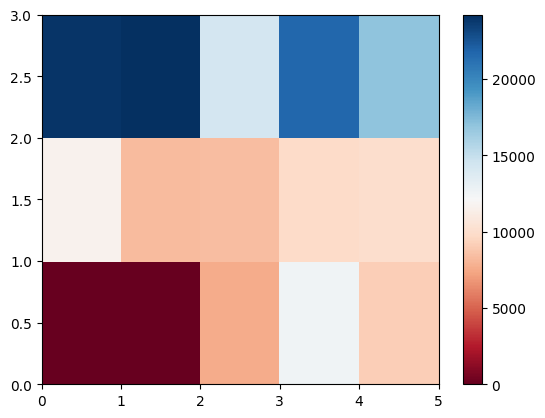

In [37]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

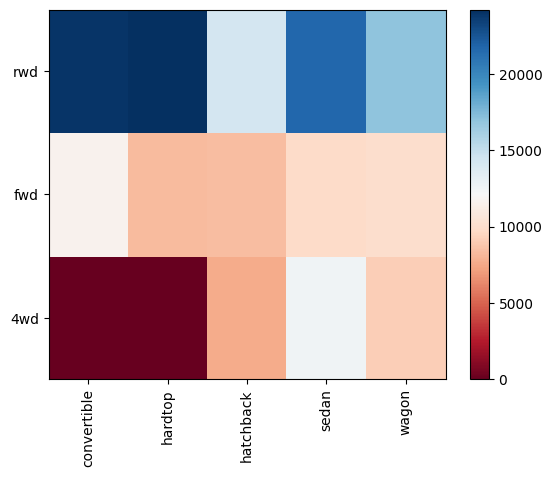

In [38]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

**Correlation and Causation**
Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

**Pearson Correlation**

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.

**P-value**

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  
<
  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  
<
  0.05: there is moderate evidence that the correlation is significant.
the p-value is  
<
  0.1: there is weak evidence that the correlation is significant.
the p-value is  
>
  0.1: there is no evidence that the correlation is significant.

In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


In [40]:
df["bore"] = df["bore"].astype(float)
avg_bore = df["bore"].mean()
df["bore"].replace(np.nan, avg_bore, inplace=True)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431537659807734  with a P-value of P =   8.051208825441031e-17


**ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

**Drive Wheels**
Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data

In [41]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495
1,rwd,16500
3,fwd,13950
4,4wd,17450
5,fwd,15250
136,4wd,7603


In [42]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
196,rwd,sedan,16845
197,rwd,sedan,19045
198,rwd,sedan,21485
199,rwd,sedan,22470


In [43]:
grouped_test2.get_group('4wd')['price']

4      17450
136     7603
140     9233
141    11259
144     8013
145    11694
150     7898
151     8778
Name: price, dtype: int64

In [44]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


**Conclusion: Important Variables**

Continuous numerical variables: att coef **using pearsonr**
- Length 0.691
- Width 0.751
- Curb-weight 0.834
- Engine-size 0.872
- Horsepower 0.809
- City-mpg  -0.687
- Highway-mpg -0.70
- Wheel-base 0.585 relationship isn't extremely strong
- Bore  0.54

Categorical variables: **using AVUVA**
- Drive-wheels

As we now move into building machine learning models to automate our analysis, **feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.**

In [45]:
grouped_test2=df_gptest[['body-style', 'price']].groupby(['body-style'])
grouped_test2.head(2)
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('convertible')['price'], grouped_test2.get_group('hatchback')['price'], grouped_test2.get_group('sedan')['price'],
   grouped_test2.get_group('wagon')['price'],   grouped_test2.get_group('hardtop')['price']  )

print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 9.12875185470821 , P = 8.779795237614595e-07
